In [1]:
# k-Fold Cross Validation

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import time
import sys

def display_time(seconds, granularity=2):
    result = []
    intervals = (
    ('semanas', 604800),  # 60 * 60 * 24 * 7
    ('dias', 86400),    # 60 * 60 * 24
    ('horas', 3600),    # 60 * 60
    ('minutos', 60),
    ('segundos', 1),
    )

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

# Importing the dataset
dataset = pd.read_table('data.txt')
X = dataset.values[:,:3]
r_y = dataset.values[:,3]
y = [1.0 if i == 1 else 0.0 for i in r_y]
y = np.array(y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Applying k-Fold Cross Validation
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
# Applying metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsRegressor

total_tasks = 100
tasks_count = 0
last_time = 0
start_time = time.time()

k_log_losses = []

for k in range(total_tasks):
    log_losses = []

    for i in range(10):
        skf = StratifiedKFold(n_splits = 10, shuffle=True)
        for train, test in skf.split(X, y):
            X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
            classifier = KNeighborsRegressor(n_neighbors=k+1)
            classifier.fit(X_train, y_train)
            y_prob = classifier.predict(X_test)
            log_losses.append(log_loss(y_test, y_prob))
    k_log_losses.append((np.array(log_losses)).mean())
    
    tasks_count += 1
    last_time = time.time()
    exec_time = last_time - start_time
    remaining_time = (total_tasks - tasks_count) * (exec_time) / tasks_count
    sys.stdout.write("\rCalculado ... %.2f%%. Tempo execução: %s. Tempo restante estimado: %s" % (((100.0 * tasks_count / total_tasks)), display_time(last_time - start_time), display_time(remaining_time)))
    sys.stdout.flush()

Calculado ... 100.00%. Tempo execução: 1.0 minuto, 3.0 segundos. Tempo restante estimado: 

/home/rodrigo/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


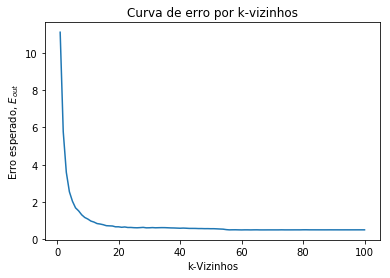

In [15]:
reg = np.arange(1, total_tasks+1)

plt.plot(reg, k_log_losses)

#plt.xlim([0.0, 2.0])
#plt.ylim([0.5, 0.7])
plt.xlabel('k-Vizinhos')
plt.ylabel('Erro esperado, $E_{out}$')
plt.title("Curva de erro por k-vizinhos")
plt.legend(loc='upper right')
plt.show()

In [2]:
k_log_losses

[11.030425819659904,
 5.5778454119636329,
 3.5622572180284791,
 2.5887419592914669,
 2.0055598514044757,
 1.6629148291698073,
 1.4908541907944981,
 1.3006096824487168,
 1.1837877947567059,
 1.0097562392863662,
 0.9360500361202051,
 0.90488949405113583,
 0.86119417590835201,
 0.7801364221806163,
 0.75937105742032573,
 0.74268032079519641,
 0.70279326349911986,
 0.68697357778598789,
 0.69156908127314209,
 0.66276093925436685,
 0.63795451113715862,
 0.62166503281991636,
 0.6393540391379583,
 0.63728355562699013,
 0.63147162760008113,
 0.61719371756298225,
 0.61599305319480802,
 0.61426332575157738,
 0.61301782379000636,
 0.62056993503327396,
 0.62115342274636187,
 0.61316281404297024,
 0.62760028234280474,
 0.62208301191970272,
 0.62822344007079556,
 0.62500861123648221,
 0.60289481171318204,
 0.61179342879268428,
 0.61054233383011336,
 0.59177843637941185,
 0.58648961876320971,
 0.57930470507555332,
 0.57642113008151696,
 0.57182593584157193,
 0.5757179619955245,
 0.5717665073081567,
 0.

In [4]:
log_min = 999999
i_min = 9999
for i in range(len(k_log_losses)):
    if k_log_losses[i] < log_min:
        log_min = k_log_losses[i]
        i_min = i

In [5]:
i_min

69

In [6]:
k_log_losses[19]

0.66276093925436685